In [297]:
# Libraries import
from sklearn import linear_model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [298]:
# Water falling initial pixel coordinates
x0 = 253
y0 = 561

In [299]:
# Collected data
df_ = pd.read_csv('rain.csv')

# Data normalization
max_px = max(df_['px'])
max_py = max(df_['py'])

df['px'] = df_['px']/max_px
df['py'] = df_['py']/max_py

# Data Interpolation
n = 2;

df['1'] = 1

fields = ['1', 'px']

for i in range(2, n+1):
    field = 'px**' + str(i)
    fields.append(field)
    
    df[field] = df['px']**i

fields.append('py')

df = df[fields]

df_np = df.to_numpy()

x = df_np[:, 0:n+1]
y = df_np[:, n+1:n+2]


In [300]:
regr = linear_model.LinearRegression()
predictor = regr.fit(x, y)
df_np = df.to_numpy()

In [301]:
dx = 0.01

vals = np.arange(0, 1, dx)

vecs = []


for i in range(0, n+1):
    vec = vals**i
    vecs.append(vec)

X = np.column_stack(tuple(vecs))
Y = regr.predict(X)

(239.437, 537.823, 521.6902413368687, 1227.6261359327868)

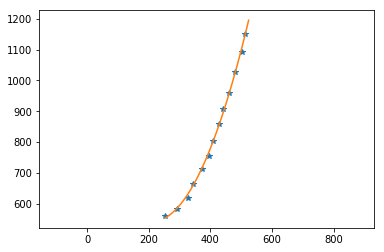

In [302]:
px = df['px'].to_numpy()
py = df['py'].to_numpy()

x_orig = x0 + px*max_px
y_orig = y0 + py*max_py

x_pred = x0 + vals*max_px
y_pred = y0 + Y*max_py

plt.figure()
plt.plot(x_orig, y_orig, '*')
plt.plot(x_pred, y_pred)

plt.axis('equal')

In [303]:
regr.coef_

array([[0.        , 0.22700532, 0.75534866]])

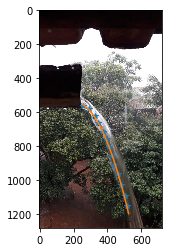

In [304]:
img = plt.imread('rain.jpg')

plt.figure()
plt.plot(x_orig, y_orig, '*')
plt.plot(x_pred, y_pred)

plt.imshow(img)

plt.savefig('rain_interp.eps')